In [19]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt
import seaborn as sns

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
    #Moutain View California.
	"latitude": 37.3861,
	"longitude": -122.0839,
	"hourly": ["temperature_2m"],
	"start_date": "2023-09-02",
	"end_date": "2023-10-28"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

#Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()


hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m


hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 37.39019012451172°E -122.07135009765625°N
Elevation 37.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                    date  temperature_2m
0    2023-09-02 00:00:00       22.504999
1    2023-09-02 01:00:00       22.105000
2    2023-09-02 02:00:00       20.705000
3    2023-09-02 03:00:00       19.205000
4    2023-09-02 04:00:00       18.504999
...                  ...             ...
1363 2023-10-28 19:00:00       15.159000
1364 2023-10-28 20:00:00       16.709000
1365 2023-10-28 21:00:00       18.409000
1366 2023-10-28 22:00:00       19.009001
1367 2023-10-28 23:00:00       19.559000

[1368 rows x 2 columns]


In [20]:
hourly_dataframe.to_excel('data/Api/weather.xlsx')

In [49]:
weather_df = pd.read_excel('weather.xlsx')
weather_df

,Unnamed: 0,date,temperature_2m
0,0,2023-09-02 00:00:00,22.504999
1,1,2023-09-02 01:00:00,22.105000
2,2,2023-09-02 02:00:00,20.705000
3,3,2023-09-02 03:00:00,19.205000
4,4,2023-09-02 04:00:00,18.504999
...,...,...,...
1363,1363,2023-10-28 19:00:00,15.159000
1364,1364,2023-10-28 20:00:00,16.709000
1365,1365,2023-10-28 21:00:00,18.409000
1366,1366,2023-10-28 22:00:00,19.009001


In [22]:
weather_df.columns

Index(['Unnamed: 0', 'date', 'temperature_2m'], dtype='object')

In [51]:
weather_df = weather_df[['date','temperature_2m']]

In [25]:
weather_df.dtypes

date              datetime64[ns]
temperature_2m           float64
dtype: object

In [26]:
weather_df.isna().sum()

date              0
temperature_2m    0
dtype: int64

In [28]:
weather_df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x26cbc714280>,
 'caps': [<matplotlib.lines.Line2D at 0x26cbc7147c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26cbc6dbfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x26cbc714d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x26cbc714fa0>],
 'means': []}

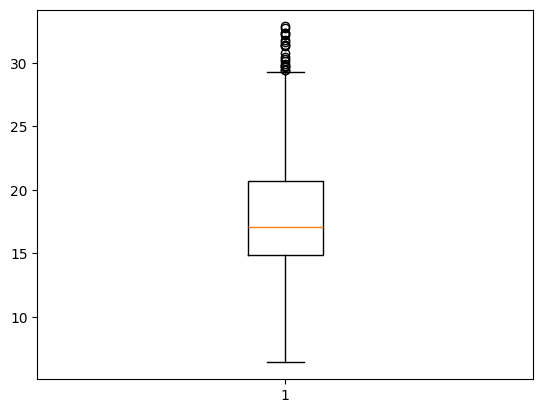

In [31]:
import matplotlib.pyplot as plt
plt.boxplot(weather_df['temperature_2m'])

In [34]:
weather_df.loc[weather_df['temperature_2m']>28]

,date,temperature_2m
789,2023-10-04 21:00:00,29.109001
790,2023-10-04 22:00:00,29.909000
791,2023-10-04 23:00:00,29.759001
792,2023-10-05 00:00:00,29.659000
793,2023-10-05 01:00:00,29.259001
812,2023-10-05 20:00:00,29.409000
813,2023-10-05 21:00:00,30.759001
814,2023-10-05 22:00:00,31.409000
815,2023-10-05 23:00:00,31.759001
816,2023-10-06 00:00:00,32.209000


It is due to effects of global warming. Also having them in the dataset will help to cover some hot days.


An article on why the weather was hot during last october in california.

Source:
https://www.pbs.org/newshour/science/october-was-the-5th-straight-month-to-set-new-heat-record-in-2023#:~:text=This%20year%20has%20been%20so,warming%20than%20in%20the%20past.

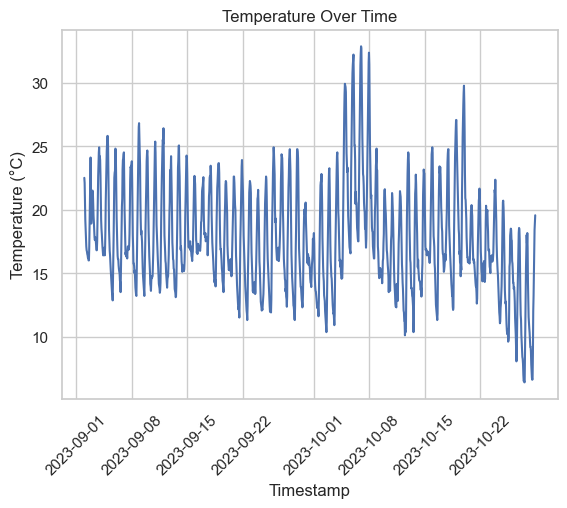

In [41]:
#visualization


# Set Seaborn style
sns.set(style="whitegrid")

# Plot the line chart using Seaborn
sns.lineplot(x='date', y='temperature_2m', data=weather_df, color='b')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()
 

Now Due to unavailability of historical weather data for the experiment timeline, I will be manipulate this timestamp to match battery aging experiment timeline.

In [52]:
weather_df.loc[weather_df['date'].dt.month == 9, 'date'] = weather_df.loc[
    weather_df['date'].dt.month == 9, 'date'].apply(lambda x: x.replace(month=4))
weather_df.loc[weather_df['date'].dt.month == 10, 'date'] = weather_df.loc[
    weather_df['date'].dt.month == 10, 'date'].apply(lambda x: x.replace(month=5))


weather_df

,date,temperature_2m
0,2023-04-02 00:00:00,22.504999
1,2023-04-02 01:00:00,22.105000
2,2023-04-02 02:00:00,20.705000
3,2023-04-02 03:00:00,19.205000
4,2023-04-02 04:00:00,18.504999
...,...,...
1363,2023-05-28 19:00:00,15.159000
1364,2023-05-28 20:00:00,16.709000
1365,2023-05-28 21:00:00,18.409000
1366,2023-05-28 22:00:00,19.009001


In [55]:
weather_df['new_date'] = weather_df['date'].dt.date
weather_df['hour'] = weather_df['date'].dt.hour

# Round off the 'temp' column
weather_df['temperature_2m'] = weather_df['temperature_2m'].round()

weather_df.drop('date',axis=1,inplace=True)
weather_df

,temperature_2m,new_date,hour
0,23.0,2023-04-02,0
1,22.0,2023-04-02,1
2,21.0,2023-04-02,2
3,19.0,2023-04-02,3
4,19.0,2023-04-02,4
...,...,...,...
1363,15.0,2023-05-28,19
1364,17.0,2023-05-28,20
1365,18.0,2023-05-28,21
1366,19.0,2023-05-28,22
